**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
#data['time'].astype('time')
data.count()
#data.nunique()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#deciding to drop car as a column as there were only 108 non-null values and dropping the null values from other columns leaving 12079 values 
dt = data.drop(columns = 'car').dropna()
#dt['age'] = pd.to_numeric(dt['age'], downcast = 'integer', errors = 'coerce')
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [8]:
# creating function to estimate % acceptance
def percent_accept(src):
    percent = round((src[src['Y'] == 1]['Y'].count()/src['Y'].count()*100),2)
    return percent

#accept_coupon = dt[dt['Y']==1]['Y'].count()/dt['Y'].count()
# calculate accepted coupon overall
accept_coupon = percent_accept(dt)
print( f'{accept_coupon} percent of all coupons are accepted')

56.93 percent of all coupons are accepted


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

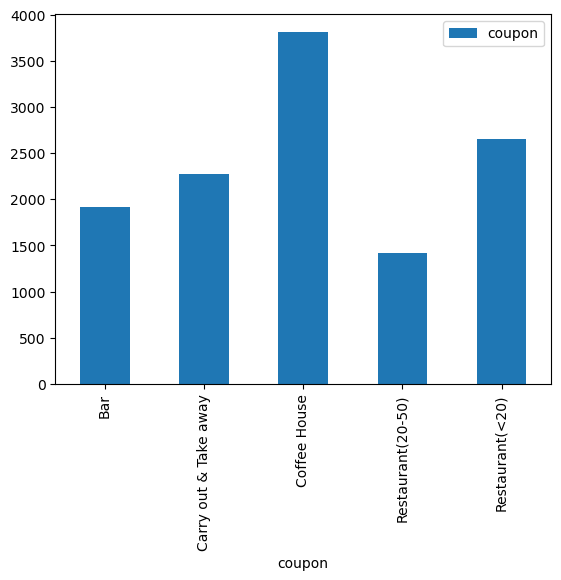

In [9]:
dt.groupby(by = 'coupon')[['coupon']].count().plot.bar()

6. Use a histogram to visualize the temperature column.

<Axes: ylabel='Frequency'>

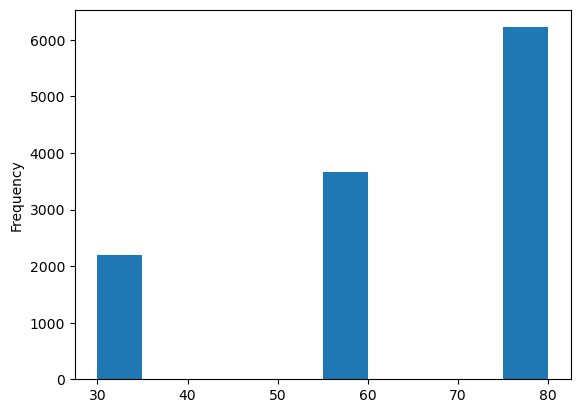

In [10]:
dt['temperature'].plot.hist()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
dt_bar = dt[dt['coupon'] == 'Bar']
#dt_bar.head()
#dt_bar.groupby(by = 'RestaurantLessThan20').count()
#dt_bar.groupby(by = 'has_children').count()
#dt_bar.groupby(by = 'occupation').count()

2. What proportion of bar coupons were accepted?


In [12]:
#accepted_bar_copon = dt_bar[dt_bar['Y']==1]['Y'].count()/dt_bar['Y'].count()
accepted_bar_coupon = percent_accept(dt_bar)
print( f'{accepted_bar_coupon} percent of bar coupon are accepted')

41.19 percent of bar coupon are accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
# dt_bar.groupby(by = ['RestaurantLessThan20'])[['RestaurantLessThan20']].count().plot.bar()
# bar chart suggests that there are 5 classification in data with 2 classification that can be related to visits less than 3 times  

dt_bar_less_than_3 = (dt_bar[(dt_bar['Bar'] =='1~3') | # went to bar 1-3 times 
                             (dt_bar['Bar'] =='less1') | # went to bar 0-1  times
                             (dt_bar['Bar'] =='never')]) # never went to bar

dt_bar_more_than_3 = (dt_bar[(dt_bar['Bar'] =='4~8') | # went to bar 4-8 times
                             (dt_bar['Bar'] =='gt8')]) # went to bar more than 8 times
                                     
(print('Acceptanace rate of of those who went to bar <3 is ' 
       + percent_accept(dt_bar_less_than_3).astype('str') 
       + ' while that of >3 is '
       + percent_accept(dt_bar_more_than_3).astype('str')
      ))

# Both rates differs significantly as those who went to bar more than 3 times have acceptance rate of 76 

Acceptanace rate of of those who went to bar <3 is 37.27 while that of >3 is 76.17


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
dt_bar2 = dt_bar[((dt_bar['age']!='21')|dt_bar['age']!='below 21') & ((dt_bar['Bar']!='never') | (dt_bar['Bar']!='less1'))]

(print('Coupon acceptanace rate of of those who went to bar more than 1 time and are age >25 is ' 
       + percent_accept(dt_bar2).astype('str') 
       + ' while all other is '
       + percent_accept(dt).astype('str')
      ))
# Customer who are >25 years of age and have went to bar more than once a month utilizes coupon significantly lower than standard population. 

Coupon acceptanace rate of of those who went to bar more than 1 time and are age >25 is 41.19 while all other is 56.93


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [15]:
dt_bar3 = (dt_bar[(dt_bar['has_children']!=1) &  # who doesn't have children
                  ((dt_bar['Bar']!='never') | (dt_bar['Bar']!='less1')) & # and who goes to bar more than once  
                  (dt_bar['occupation'] != 'Farming Fishing & Forestry')]) # and whose occupation is not Farming Fishing

(print('Coupon acceptanace rate of of those who went to bar > 1 time, had no kids and doesn\'t work in Farming is '
       + percent_accept(dt_bar3).astype('str') 
       + ' while all other is '
       + percent_accept(dt).astype('str')
      ))
# Customer who went to bar, had no kids as passenger and didn't work in farming-fishing-forestry industry seem to be have lower acceptance rate than overall population

Coupon acceptanace rate of of those who went to bar > 1 time, had no kids and doesn't work in Farming is 49.77 while all other is 56.93


6. Compare the acceptance rates between those drivers who:

1. go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
2. go to bars more than once a month and are under the age of 30 *OR*
3. go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [16]:
# dt_bar4 = go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
dt_bar4 = (dt_bar[((dt_bar['Bar']!='never') | (dt_bar['Bar']!='less1')) & # when to bar more than once
                  (dt_bar['passanger']!='Kid(s)') & 
                  (dt_bar['maritalStatus']!='Widowed')])
    
dt_bar5 = (dt_bar[((dt_bar['Bar']!='never') | (dt_bar['Bar']!='less1')) & # when to bar more than once
                  ((dt_bar['age']=='21')|(dt_bar['age']=='26'))])

dt_bar6 = (dt_bar[((dt_bar['RestaurantLessThan20'] =='4~8') | (dt_bar['RestaurantLessThan20'] =='gt8')) & # went to retaurant >4 times 
                  (dt_bar['income']=='$12500 - $24999') | (dt_bar['income']=='$25000 - $37499') | (dt_bar['income']=='$37500 - $49999')]) 

(print('Coupon acceptanace rate for group #1 is '
       + percent_accept(dt_bar4).astype('str') 
       + ' while group #2 is '
       + percent_accept(dt_bar5).astype('str')
       + ' while group #3 is '
       + percent_accept(dt_bar6).astype('str')

      ))

Coupon acceptanace rate for group #1 is 43.54 while group #2 is 49.54 while group #3 is 41.52


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [17]:
# People who goes to Bar more than 3 times a month are more likely to accept bar coupons than any other evaluated customer segment who goes to bar

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [18]:
# Review segment who received Coffee House Coupons

In [19]:
dt_coffee = dt[dt['coupon'] == 'Coffee House']
percent_accept(dt_coffee)

49.63

In [30]:
percent_accept(dt_coffee[dt_coffee['direction_same']==1])

52.65

In [33]:
dt_coffee.info()
#sns.countplot(data = 'dt_coffee', x='weather', hue = 'Y')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null 

<Axes: xlabel='destination', ylabel='count'>

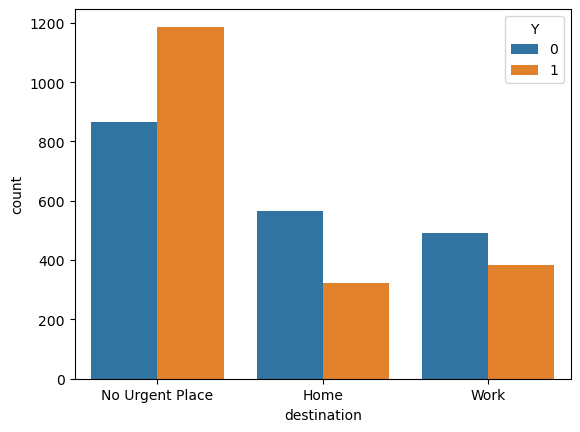

In [38]:
sns.countplot(data = dt_coffee, x ='destination', hue = 'Y')
#Desitnation should have impact on coffee coupon acceptance. Coupon acceptance is better when cutomer is not in "Hurry" and much lower if they are going to Home or Work.

<Axes: xlabel='weather', ylabel='count'>

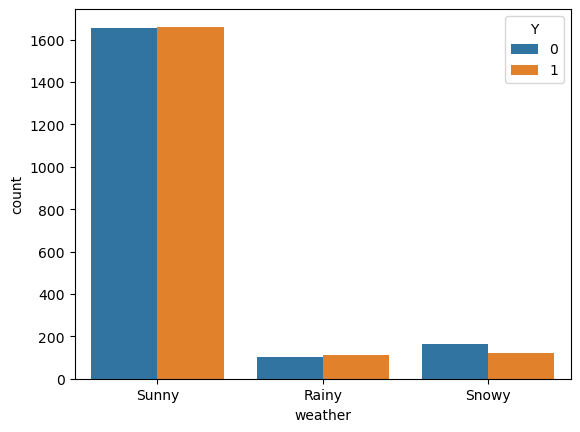

In [41]:
sns.countplot(data = dt_coffee, x ='weather', hue = 'Y')
#Weather has some impact on coffee coupon acceptance. Coupon acceptance is better when it's "Sunny" or "Rainy" weather instead of "Snowy"

<Axes: xlabel='time', ylabel='count'>

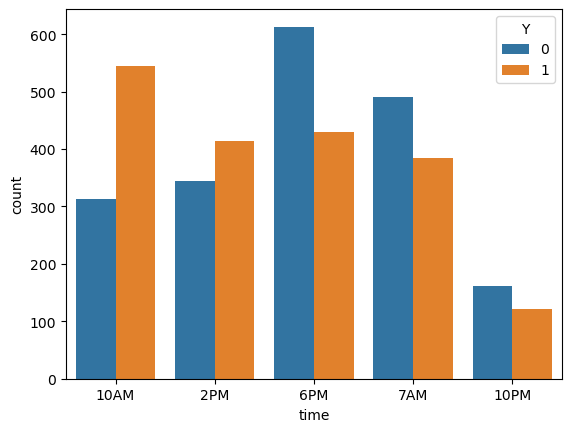

In [42]:
sns.countplot(data = dt_coffee, x ='time', hue = 'Y')
#Time is having significant impact on Acceptance rate. Better acceptable rate in Morning and Afternoon than late evenings or night.

C:\Users\a72016\AppData\Local\Temp\ipykernel_16764\2126144322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt_coffee.corr()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.038703,NaN,-0.159061,-0.066061,0.013614,-0.013614,0.071414
has_children,-0.038703,1.000000,NaN,0.102322,0.010651,-0.043098,0.043098,-0.013658
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.159061,0.102322,NaN,1.000000,0.279968,-0.292716,0.292716,-0.094128
toCoupon_GEQ25min,-0.066061,0.010651,NaN,0.279968,1.000000,-0.139874,0.139874,-0.089673
direction_same,0.013614,-0.043098,NaN,-0.292716,-0.139874,1.000000,-1.000000,0.029033
direction_opp,-0.013614,0.043098,NaN,0.292716,0.139874,-1.000000,1.000000,-0.029033
Y,0.071414,-0.013658,NaN,-0.094128,-0.089673,0.029033,-0.029033,1.000000


<Axes: xlabel='toCoupon_GEQ15min', ylabel='count'>

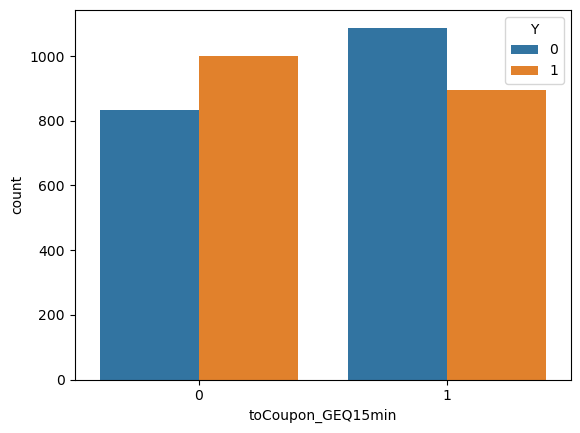

In [48]:
#sns.countplot(data = dt_coffee, x ='toCoupon_GEQ5min', hue = 'Y')
#sns.countplot(data = dt_coffee, x ='toCoupon_GEQ25min', hue = 'Y')
sns.countplot(data = dt_coffee, x ='toCoupon_GEQ15min', hue = 'Y')

# If customer is not within 15 mins distance of coupon place than acceptance rate of coupon is higher and need to add effect of direction of travel 

In [66]:
GEQ15min = dt_coffee[dt_coffee['toCoupon_GEQ15min'] == 0] # Coffee House Coupon to people more than 15 mins but less than 25 mins distance
#sns.countplot(data = GEQ15min, x ='direction_same', hue = 'Y')
#GEQ15min_same_direction = GEQ15min[GEQ15min['direction_same']==1]
#percent_accept(GEQ15min_same_direction)
percent_accept(GEQ15min)

54.53

<Axes: xlabel='RestaurantLessThan20', ylabel='count'>

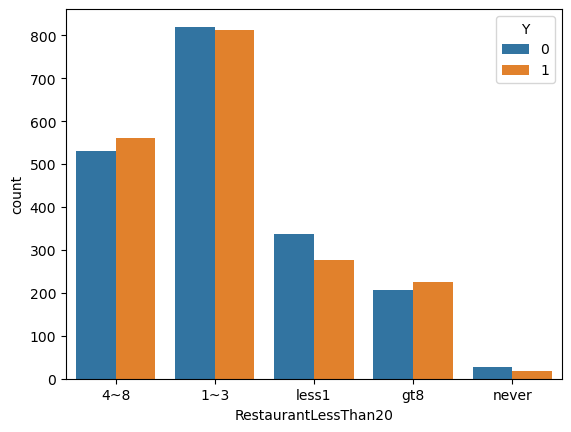

In [67]:
sns.countplot(data = dt_coffee, x ='RestaurantLessThan20', hue = 'Y')
# Price senstive customer (spend less than $20) and frequent (>4 times a month) dinners have high chance to accept than others


<Axes: xlabel='gender', ylabel='count'>

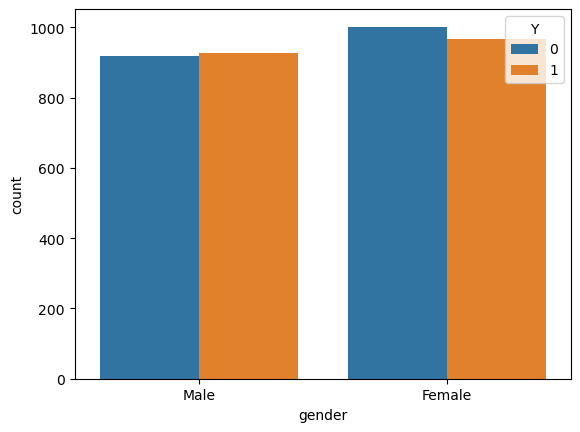

In [122]:
sns.countplot(data = dt_coffee, x ='gender', hue = 'Y')

<Axes: xlabel='expiration', ylabel='count'>

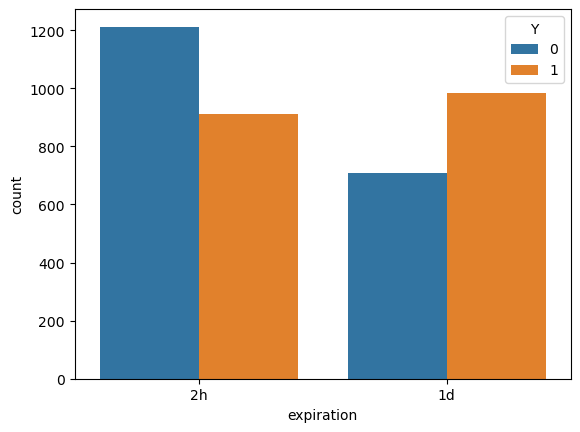

In [124]:
sns.countplot(data = dt_coffee, x ='expiration', hue = 'Y')
# Coffee coupons that has duration of 1 days have higher acceptance than 2hr coupon 

In [133]:
coupon_2h = dt_coffee[['expiration','Y']].where(dt_coffee['expiration']=='2h')
coupon_1d = dt_coffee[['expiration','Y']].where(dt_coffee['expiration']=='1d')

(print('Coffee coupon with 2h validity had success rate of ' + percent_accept(coupon_2h).astype('str') 
      + ' validity of 1Day has success rate of ' + percent_accept(coupon_1d).astype('str')))

Coffee coupon with 2h validity had success rate of 42.91 validity of 1Day has success rate of 58.06
